In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
survey_data = pd.read_excel('DACC_Hackathon_Media_Habit_Survey.xlsx', sheet_name ='Raw Responses')
survey_data

ID  v_16  v_17  v_18  v_19  ...  v_309  v_310  v_311  v_312  v_333
0     426187101     1   3.0   4.0   1.0  ...      0      0      0    NaN    1.0
1     203116101     1   3.0   3.0   1.0  ...      0      1      0    NaN    0.0
2     248111101     1   7.0   7.0   1.0  ...      0      1      0    NaN    0.0
3     201019101     1   7.0   7.0   4.0  ...      0      1      0    NaN    0.0
4     246226102     3   3.0   3.0   1.0  ...      0      1      0    NaN    0.0
...         ...   ...   ...   ...   ...  ...    ...    ...    ...    ...    ...
1886  802186201     1   4.0   4.0   4.0  ...      0      1      0    NaN    0.0
1887  802188101     1   7.0   5.0   2.0  ...      0      0      0    NaN    1.0
1888  802188801     1   8.0   8.0   3.0  ...      0      1      0    NaN    0.0
1889  802189701     2   6.0   7.0   3.0  ...      1      1      0    NaN    0.0
1890  802220001     1   5.0   5.0   3.0  ...      0      0      0    NaN    0.0

[1891 rows x 261 columns]

In [3]:
panelist_data = pd.read_excel('DACC_Hackathon_Panelists_Demogs.xlsx')
panelist_data['ID'] = panelist_data['ID'].map(lambda x: x.lstrip('Panel'))
panelist_data['ID'] = panelist_data['ID'].astype(int)
panelist_data['Income'] = panelist_data['Income'].astype(str)
panelist_data['Income'] = panelist_data['Income'].map(lambda x: x.partition("(")[2])
panelist_data['Income'] = panelist_data['Income'].map(lambda x: x.strip(")"))
panelist_data['#HH'] = panelist_data['#HH'].map(lambda x: x.rstrip("Member HH"))
panelist_data

ID            BMI  ...  #HH    Income
0     101011101          Obese  ...  1-3       Low
1     101016101        Healthy  ...  1-3       Low
2     101019101          Obese  ...  4-5       Low
3     101024101    Over Weight  ...  1-3       Low
4     105009103    Over Weight  ...  1-3       Low
...         ...            ...  ...  ...       ...
3913  802312801  Not Available  ...  4-5  Mid High
3914  802313601  Not Available  ...   6+   Mid Low
3915  802314001  Not Available  ...   6+  Mid High
3916  802315101  Not Available  ...  4-5  Mid High
3917  802315301  Not Available  ...  4-5   Mid Low

[3918 rows x 8 columns]

In [4]:
overall_data = pd.merge(panelist_data, survey_data, on = "ID")
overall_data["v_137"] = overall_data["v_137"].replace(2,0)
overall_data

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay  Urban  ...     0     0   NaN   1.0
1     105017101          Obese     Malay  Rural  ...     0     0   NaN   1.0
2     105021106          Obese     Malay  Rural  ...     0     0   NaN   1.0
3     105044101    Over Weight   Chinese  Rural  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay  Rural  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1873  802188101  Not Available     Malay  Urban  ...     0     0   NaN   1.0
1874  802188801  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1875  802188901  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1877  802220001  Not Available     Malay  Urban  ...     0     0   NaN   0.0

[1878 rows x 268 columns]

In [5]:
panelists_no_media = panelist_data[~panelist_data["ID"].isin(list(overall_data["ID"]))]
panelists_no_media

ID            BMI  ...  #HH    Income
1     101016101        Healthy  ...  1-3       Low
2     101019101          Obese  ...  4-5       Low
3     101024101    Over Weight  ...  1-3       Low
4     105009103    Over Weight  ...  1-3       Low
5     105015101        Healthy  ...   6+  Low High
...         ...            ...  ...  ...       ...
3913  802312801  Not Available  ...  4-5  Mid High
3914  802313601  Not Available  ...   6+   Mid Low
3915  802314001  Not Available  ...   6+  Mid High
3916  802315101  Not Available  ...  4-5  Mid High
3917  802315301  Not Available  ...  4-5   Mid Low

[2040 rows x 8 columns]

#Q2a# Do you have internet access at home? (q_47553 - Type 111)				
v_137	v_137	int	Single response list (vertical)	
		1	Yes	
		2	No	

In [6]:
dataset2a = overall_data[["ID", "v_137"]]


In [7]:
dataset2a

ID  v_137
0     101011101      0
1     105017101      0
2     105021106      0
3     105044101      0
4     105046101      0
...         ...    ...
1873  802188101      0
1874  802188801      1
1875  802188901      1
1876  802189701      1
1877  802220001      0

[1878 rows x 2 columns]

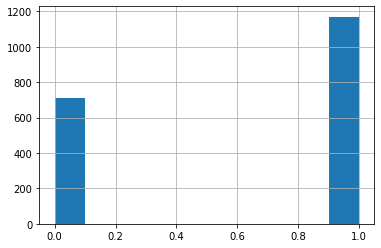

In [8]:
dataset2a["v_137"].hist()

In [9]:
sum(dataset2a["v_137"])/1878

0.6230031948881789

Above percentage is the proportion of users who have Internet access at home. If we base a media plan on Internet, this would be the proportion of users we are targeting. 

It is not a very promising value and one would recommend to definitely diversify as Internet usage is not viable as the foundation of our eventual media plan.

We then examine the factions that summate into this proportion of users. We separate the factions based on categories of income and locality as this would be key factors that decide media exposure.

In [10]:
dataset2a_strata_urban = overall_data[overall_data["Strata"] == "Urban"]

In [11]:
dataset2a_strata_urban

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay  Urban  ...     0     0   NaN   1.0
10    106003101        Healthy     Malay  Urban  ...     0     0   NaN   1.0
11    106006101          Obese     Malay  Urban  ...     0     0   NaN   1.0
12    106012101        Healthy   Chinese  Urban  ...     0     0   NaN   0.0
13    106014103    Over Weight   Chinese  Urban  ...     0     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1872  802186201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1873  802188101  Not Available     Malay  Urban  ...     0     0   NaN   1.0
1874  802188801  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1877  802220001  Not Available     Malay  Urban  ...     0     0   NaN   0.0

[1580 rows x 268 columns]

Note at this point that the vast majority who responded to the media poll were from the Urban strata and hence, it would be form up the majority of the poll.

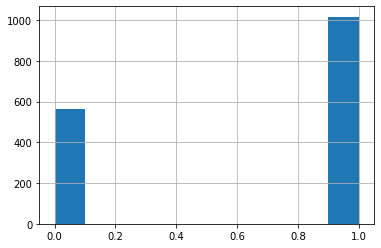

In [12]:
dataset2a_strata_urban["v_137"].hist()

In [13]:
sum(dataset2a_strata_urban["v_137"])/1580

0.6436708860759494

Above percentage is the proportion of urban users who have Internet access at home. 

In [14]:
dataset2a_strata_rural = overall_data[overall_data["Strata"] == "Rural"]

In [15]:
dataset2a_strata_rural

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
1     105017101          Obese     Malay  Rural  ...     0     0   NaN   1.0
2     105021106          Obese     Malay  Rural  ...     0     0   NaN   1.0
3     105044101    Over Weight   Chinese  Rural  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay  Rural  ...     1     0   NaN   0.0
5     105048101          Obese     Malay  Rural  ...     0     0   NaN   1.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1858  802165201  Not Available     Malay  Rural  ...     0     0   NaN   1.0
1859  802166601  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1860  802166801  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1867  802177801  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1875  802188901  Not Available     Malay  Rural  ...     1     0   NaN   0.0

[298 rows x 268 columns]

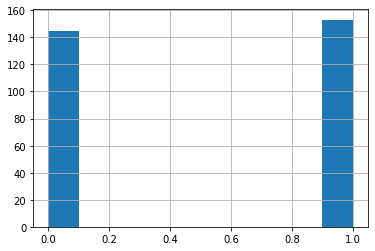

In [16]:
dataset2a_strata_rural["v_137"].hist()

In [17]:
sum(dataset2a_strata_rural["v_137"])/298

0.5134228187919463

Strata
Rural    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Urban    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

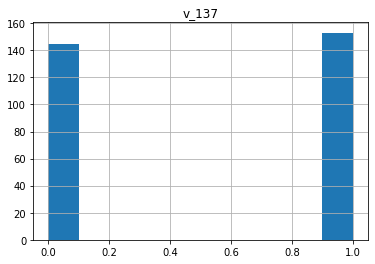

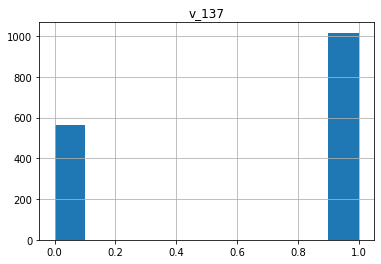

In [18]:
overall_data[["v_137", "Strata"]].groupby("Strata").hist(label = "Strata")

Above percentage is the percentage of rural users who have Internet access at home.

Based on the two, it can be seen that the internet aspect of our media plan would definitely strongly favour the urban strata of users.

Hence, a new consideration of the media plan is to see which outlet would have greater media exposure for the rural strata of users.

Since we mentioned that locality may be a consideration for a possible lack of facilities that would generate media exposure, we then look at the areas in which panelists are from.

In [19]:
dataset2a_area_north = overall_data[overall_data["Location"] == "North"]

In [20]:
dataset2a_area_north

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay  Urban  ...     0     0   NaN   1.0
1     105017101          Obese     Malay  Rural  ...     0     0   NaN   1.0
2     105021106          Obese     Malay  Rural  ...     0     0   NaN   1.0
3     105044101    Over Weight   Chinese  Rural  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay  Rural  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1840  802150001  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1850  802159601  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1852  802161001  Not Available     Malay  Rural  ...     0     0   NaN   1.0
1867  802177801  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1871  802182401  Not Available     Malay  Urban  ...     1     0   NaN   0.0

[493 rows x 268 columns]

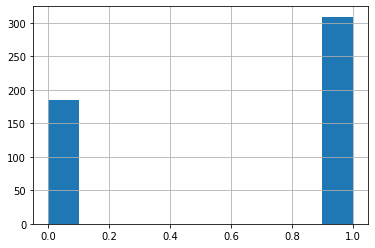

In [21]:
dataset2a_area_north["v_137"].hist()

In [22]:
sum(dataset2a_area_north["v_137"])/493

0.6267748478701826

In [23]:
dataset2a_area_central = overall_data[overall_data["Location"] == "Central"]

In [24]:
dataset2a_area_central 

ID            BMI Ethnicity  ... v_311        v_312 v_333
297   201019101    Over Weight     Malay  ...     0          NaN   0.0
298   201067101          Obese     Malay  ...     0          NaN   NaN
299   201075101        Healthy   Chinese  ...     0          NaN   0.0
300   201078101   Under Weight   Chinese  ...     1  shoppee pay   0.0
301   201121101    Over Weight     Malay  ...     0          NaN   0.0
...         ...            ...       ...  ...   ...          ...   ...
1863  802171401  Not Available     Malay  ...     0          NaN   0.0
1869  802181201  Not Available     Malay  ...     0          NaN   0.0
1873  802188101  Not Available     Malay  ...     0          NaN   1.0
1874  802188801  Not Available     Malay  ...     0          NaN   0.0
1877  802220001  Not Available     Malay  ...     0          NaN   0.0

[756 rows x 268 columns]

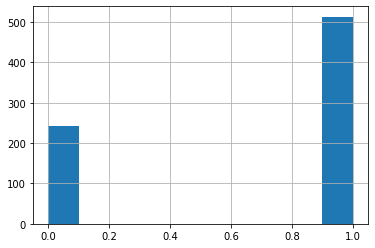

In [25]:
dataset2a_area_central["v_137"].hist()

In [26]:
sum(dataset2a_area_central["v_137"])/756

0.6785714285714286

In [27]:
dataset2a_area_south = overall_data[overall_data["Location"] == "South"]

In [28]:
dataset2a_area_south

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
688   301003101        Healthy   Chinese  Urban  ...     0     0   NaN   1.0
689   301023101        Healthy    Others  Urban  ...     0     0   NaN   1.0
690   301035101        Healthy     Malay  Urban  ...     1     0   NaN   NaN
691   301042101    Over Weight     Malay  Urban  ...     1     0   NaN   0.0
692   301045101        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1866  802177201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1870  802181601  Not Available     Malay  Urban  ...     0     0   NaN   1.0
1872  802186201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1875  802188901  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0

[320 rows x 268 columns]

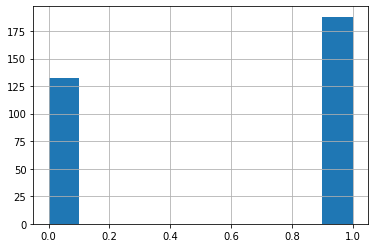

In [29]:
dataset2a_area_south["v_137"].hist()

In [30]:
sum(dataset2a_area_south["v_137"])/320

0.5875

In [31]:
dataset2a_area_east = overall_data[overall_data["Location"] == "East Coast"]

In [32]:
dataset2a_area_east 

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
857   401011102          Obese     Malay  Urban  ...     0     0   NaN   1.0
858   401027101        Healthy     Malay  Urban  ...     0     0   NaN   1.0
859   401045101        Healthy     Malay  Urban  ...     1     0   NaN   0.0
860   401048101    Over Weight     Malay  Urban  ...     1     0   NaN   0.0
861   401087101   Under Weight     Malay  Urban  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1858  802165201  Not Available     Malay  Rural  ...     0     0   NaN   1.0
1859  802166601  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1860  802166801  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1865  802173301  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1868  802177901  Not Available     Malay  Urban  ...     1     0   NaN   0.0

[309 rows x 268 columns]

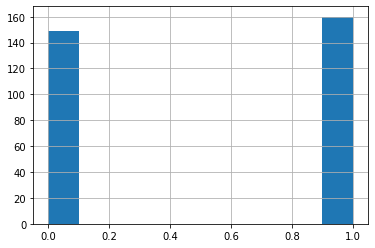

In [33]:
dataset2a_area_east["v_137"].hist()

In [34]:
sum(dataset2a_area_east["v_137"])/309

0.517799352750809

Favouring an Internet plan would heavily disadvantage individuals living on the East Coast and the South.

Location
Central       [[AxesSubplot(0.125,0.125;0.775x0.755)]]
East Coast    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
North         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
South         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

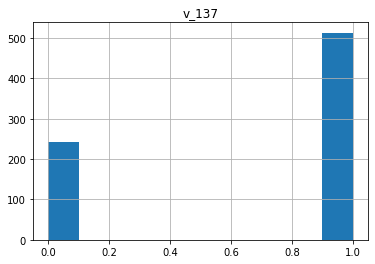

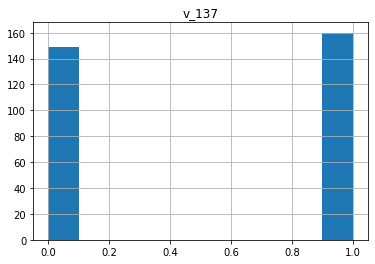

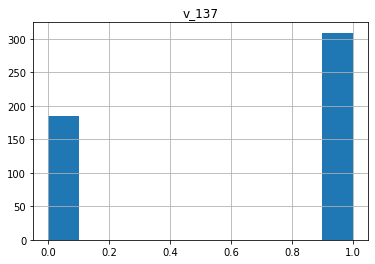

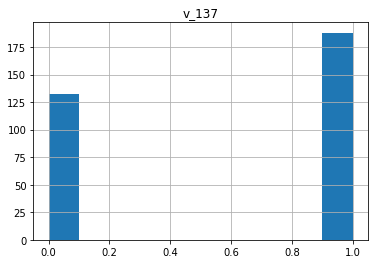

In [35]:
overall_data[["v_137", "Location"]].groupby("Location").hist(label = "Location")

In [36]:
dataset2a_income_low_low = overall_data[overall_data["Income"] == "Low"]

In [37]:
dataset2a_income_low_low

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay  Urban  ...     0     0   NaN   1.0
1     105017101          Obese     Malay  Rural  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay  Rural  ...     1     0   NaN   0.0
5     105048101          Obese     Malay  Rural  ...     0     0   NaN   1.0
6     105052101          Obese     Malay  Rural  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1840  802150001  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1846  802155501  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1848  802157701  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1852  802161001  Not Available     Malay  Rural  ...     0     0   NaN   1.0
1858  802165201  Not Available     Malay  Rural  ...     0     0   NaN   1.0

[435 rows x 268 columns]

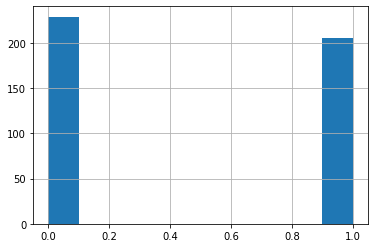

In [38]:
dataset2a_income_low_low["v_137"].hist()

In [39]:
sum(dataset2a_income_low_low['v_137'])/435

0.4735632183908046

In [40]:
dataset2a_income_low_high = overall_data[overall_data["Income"] == "Low High"]

In [41]:
dataset2a_income_low_high

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
3     105044101    Over Weight   Chinese  Rural  ...     0     0   NaN   1.0
13    106014103    Over Weight   Chinese  Urban  ...     0     0   NaN   0.0
22    107007102    Over Weight     Malay  Urban  ...     1     0   NaN   0.0
23    107009103        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
25    107025101        Healthy     Malay  Urban  ...     0     0   NaN   1.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1866  802177201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1868  802177901  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1872  802186201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1877  802220001  Not Available     Malay  Urban  ...     0     0   NaN   0.0

[363 rows x 268 columns]

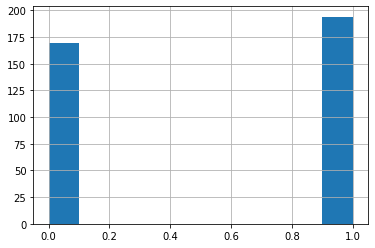

In [42]:
dataset2a_income_low_high["v_137"].hist()

In [43]:
sum(dataset2a_income_low_high['v_137'])/363

0.5344352617079889

In [44]:
dataset2a_income_mid_low = overall_data[overall_data["Income"] == "Mid Low"]

In [45]:
dataset2a_income_mid_low

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
2     105021106          Obese     Malay  Rural  ...     0     0   NaN   1.0
12    106012101        Healthy   Chinese  Urban  ...     0     0   NaN   0.0
16    106061101        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
18    106067102    Over Weight   Chinese  Urban  ...     1     0   NaN   0.0
19    106077101    Over Weight     Malay  Urban  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1865  802173301  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1869  802181201  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1870  802181601  Not Available     Malay  Urban  ...     0     0   NaN   1.0
1871  802182401  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1874  802188801  Not Available     Malay  Urban  ...     1     0   NaN   0.0

[509 rows x 268 columns]

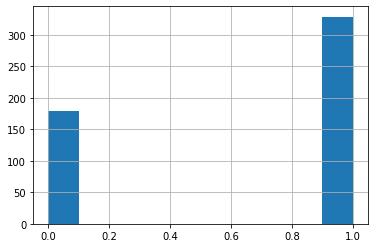

In [46]:
dataset2a_income_mid_low["v_137"].hist()

In [47]:
sum(dataset2a_income_mid_low['v_137'])/509

0.6463654223968566

In [48]:
dataset2a_income_mid_high = overall_data[overall_data["Income"] == "Mid High"]

In [49]:
dataset2a_income_mid_high

ID            BMI Ethnicity Strata  ... v_310 v_311      v_312 v_333
14    106024101        Healthy   Chinese  Urban  ...     1     1  Quinn Pay   0.0
15    106059101   Under Weight   Chinese  Urban  ...     0     0        NaN   1.0
40    109013101        Healthy   Chinese  Urban  ...     1     0        NaN   NaN
44    109045101    Over Weight     Malay  Urban  ...     0     0        NaN   0.0
45    109050101    Over Weight     Malay  Urban  ...     1     0        NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...        ...   ...
1860  802166801  Not Available     Malay  Rural  ...     1     0        NaN   0.0
1863  802171401  Not Available     Malay  Urban  ...     1     0        NaN   0.0
1867  802177801  Not Available     Malay  Rural  ...     1     0        NaN   0.0
1873  802188101  Not Available     Malay  Urban  ...     0     0        NaN   1.0
1875  802188901  Not Available     Malay  Rural  ...     1     0        NaN   0.0

[347 rows x 268 columns]

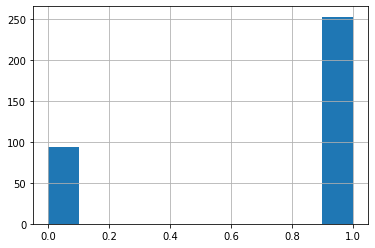

In [50]:
dataset2a_income_mid_high["v_137"].hist()

In [51]:
sum(dataset2a_income_mid_high['v_137'])/347

0.729106628242075

In [52]:
dataset2a_income_high = overall_data[overall_data["Income"] == "High"]

In [53]:
dataset2a_income_high

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
31    107047101    Over Weight    Others  Urban  ...     1     0   NaN   0.0
41    109017101        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
72    123012101        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
82    132009103        Healthy   Chinese  Urban  ...     1     0   NaN   NaN
86    132021101        Healthy   Chinese  Urban  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1838  802148401  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1843  802153001  Not Available   Chinese  Urban  ...     0     1   XOX   0.0
1855  802163001  Not Available   Chinese  Urban  ...     1     0   NaN   0.0
1862  802168601  Not Available   Chinese  Urban  ...     1     0   NaN   0.0
1864  802172401  Not Available     Malay  Urban  ...     0     0   NaN   0.0

[224 rows x 268 columns]

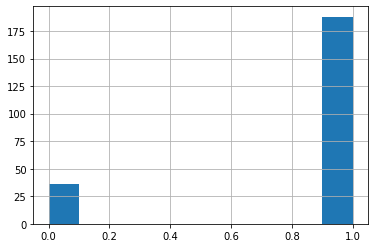

In [54]:
dataset2a_income_high["v_137"].hist()

In [55]:
sum(dataset2a_income_high['v_137'])/224

0.8392857142857143

Income
High        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Low         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Low High    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mid High    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mid Low     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

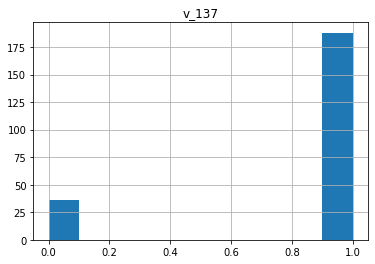

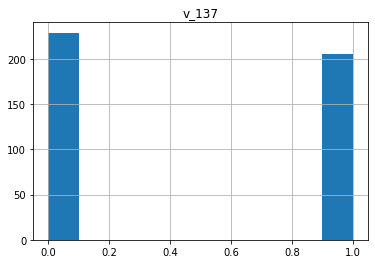

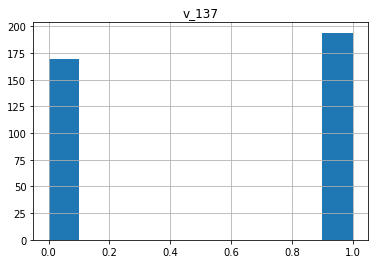

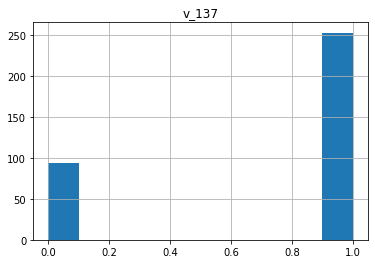

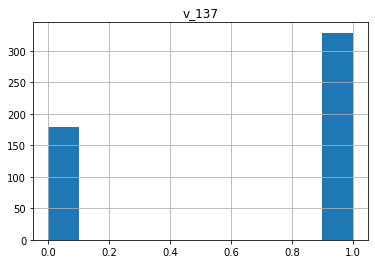

In [56]:
overall_data[["v_137", "Income"]].groupby("Income").hist(label = "Income")

As can be seen, a media plan targetting internet usage would not allow for media exposure to individuals who belong to the low income category, in particular, the lowest income 'Low High'.

Based on our current analysis, we can see that a media plan favouring Internet Access would allow for exposure to higher income individuals, as well as individuals belonging to the urban strata.

However, now comes a key question.

Is there a high correlation between income and strata?
Is there also a high correlation between strata and area?

In [57]:
altered_data = overall_data.copy()

To make it simpler, I will map the strata values to binary.

In [58]:
altered_data["Strata"] = altered_data["Strata"].map({'Urban':0, 'Rural':1})

In [59]:
dataset2a_strata_income_low_low = altered_data[altered_data["Income"] == "Low"]

In [60]:
dataset2a_strata_income_low_low

ID            BMI Ethnicity  Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay       0  ...     0     0   NaN   1.0
1     105017101          Obese     Malay       1  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay       1  ...     1     0   NaN   0.0
5     105048101          Obese     Malay       1  ...     0     0   NaN   1.0
6     105052101          Obese     Malay       1  ...     1     0   NaN   0.0
...         ...            ...       ...     ...  ...   ...   ...   ...   ...
1840  802150001  Not Available     Malay       1  ...     1     0   NaN   0.0
1846  802155501  Not Available     Malay       1  ...     1     0   NaN   0.0
1848  802157701  Not Available     Malay       0  ...     1     0   NaN   0.0
1852  802161001  Not Available     Malay       1  ...     0     0   NaN   1.0
1858  802165201  Not Available     Malay       1  ...     0     0   NaN   1.0

[435 rows x 268 columns]

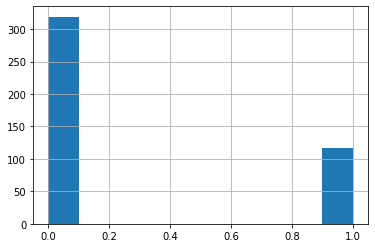

In [61]:
dataset2a_strata_income_low_low["Strata"].hist()

In [62]:
sum(dataset2a_strata_income_low_low['Strata'])/435

0.26666666666666666

In [63]:
dataset2a_strata_income_low_high = altered_data[altered_data["Income"] == "Low High"]

In [64]:
dataset2a_strata_income_low_high

ID            BMI Ethnicity  Strata  ... v_310 v_311 v_312 v_333
3     105044101    Over Weight   Chinese       1  ...     0     0   NaN   1.0
13    106014103    Over Weight   Chinese       0  ...     0     0   NaN   0.0
22    107007102    Over Weight     Malay       0  ...     1     0   NaN   0.0
23    107009103        Healthy   Chinese       0  ...     1     0   NaN   0.0
25    107025101        Healthy     Malay       0  ...     0     0   NaN   1.0
...         ...            ...       ...     ...  ...   ...   ...   ...   ...
1866  802177201  Not Available     Malay       0  ...     1     0   NaN   0.0
1868  802177901  Not Available     Malay       0  ...     1     0   NaN   0.0
1872  802186201  Not Available     Malay       0  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay       0  ...     1     0   NaN   0.0
1877  802220001  Not Available     Malay       0  ...     0     0   NaN   0.0

[363 rows x 268 columns]

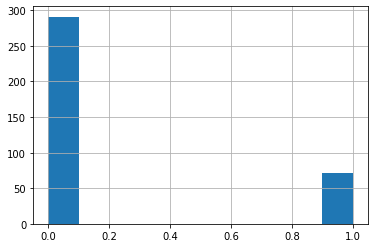

In [65]:
dataset2a_strata_income_low_high["Strata"].hist()

In [66]:
sum(dataset2a_strata_income_low_high['Strata'])/363

0.19834710743801653

In [67]:
dataset2a_strata_income_mid_low = altered_data[altered_data["Income"] == "Mid Low"]

In [68]:
dataset2a_strata_income_mid_low

ID            BMI Ethnicity  Strata  ... v_310 v_311 v_312 v_333
2     105021106          Obese     Malay       1  ...     0     0   NaN   1.0
12    106012101        Healthy   Chinese       0  ...     0     0   NaN   0.0
16    106061101        Healthy   Chinese       0  ...     1     0   NaN   0.0
18    106067102    Over Weight   Chinese       0  ...     1     0   NaN   0.0
19    106077101    Over Weight     Malay       0  ...     1     0   NaN   0.0
...         ...            ...       ...     ...  ...   ...   ...   ...   ...
1865  802173301  Not Available     Malay       0  ...     1     0   NaN   0.0
1869  802181201  Not Available     Malay       0  ...     1     0   NaN   0.0
1870  802181601  Not Available     Malay       0  ...     0     0   NaN   1.0
1871  802182401  Not Available     Malay       0  ...     1     0   NaN   0.0
1874  802188801  Not Available     Malay       0  ...     1     0   NaN   0.0

[509 rows x 268 columns]

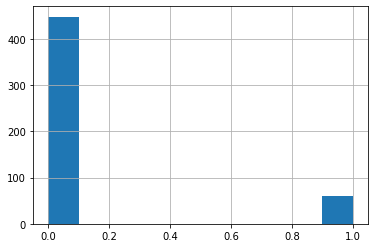

In [69]:
dataset2a_strata_income_mid_low["Strata"].hist()

In [70]:
sum(dataset2a_strata_income_mid_low['Strata'])/509

0.11984282907662082

In [71]:
dataset2a_strata_income_mid_high = altered_data[altered_data["Income"] == "Mid High"]

In [72]:
dataset2a_strata_income_mid_high

ID            BMI Ethnicity  ...  v_311      v_312 v_333
14    106024101        Healthy   Chinese  ...      1  Quinn Pay   0.0
15    106059101   Under Weight   Chinese  ...      0        NaN   1.0
40    109013101        Healthy   Chinese  ...      0        NaN   NaN
44    109045101    Over Weight     Malay  ...      0        NaN   0.0
45    109050101    Over Weight     Malay  ...      0        NaN   0.0
...         ...            ...       ...  ...    ...        ...   ...
1860  802166801  Not Available     Malay  ...      0        NaN   0.0
1863  802171401  Not Available     Malay  ...      0        NaN   0.0
1867  802177801  Not Available     Malay  ...      0        NaN   0.0
1873  802188101  Not Available     Malay  ...      0        NaN   1.0
1875  802188901  Not Available     Malay  ...      0        NaN   0.0

[347 rows x 268 columns]

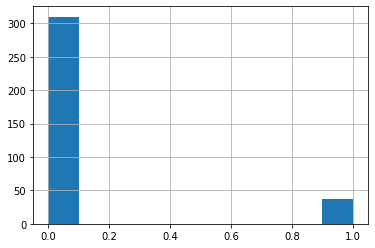

In [73]:
dataset2a_strata_income_mid_high["Strata"].hist()

In [74]:
sum(dataset2a_strata_income_mid_high['Strata'])/347

0.10662824207492795

In [75]:
dataset2a_strata_income_high = altered_data[altered_data["Income"] == "High"]

In [76]:
dataset2a_strata_income_high

ID            BMI Ethnicity  Strata  ... v_310 v_311 v_312 v_333
31    107047101    Over Weight    Others       0  ...     1     0   NaN   0.0
41    109017101        Healthy   Chinese       0  ...     1     0   NaN   0.0
72    123012101        Healthy   Chinese       0  ...     1     0   NaN   0.0
82    132009103        Healthy   Chinese       0  ...     1     0   NaN   NaN
86    132021101        Healthy   Chinese       0  ...     1     0   NaN   0.0
...         ...            ...       ...     ...  ...   ...   ...   ...   ...
1838  802148401  Not Available     Malay       0  ...     1     0   NaN   0.0
1843  802153001  Not Available   Chinese       0  ...     0     1   XOX   0.0
1855  802163001  Not Available   Chinese       0  ...     1     0   NaN   0.0
1862  802168601  Not Available   Chinese       0  ...     1     0   NaN   0.0
1864  802172401  Not Available     Malay       0  ...     0     0   NaN   0.0

[224 rows x 268 columns]

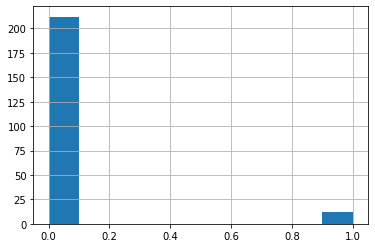

In [77]:
dataset2a_strata_income_high["Strata"].hist()

In [78]:
sum(dataset2a_strata_income_high['Strata'])/224

0.05357142857142857

Income
High        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Low         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Low High    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mid High    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mid Low     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

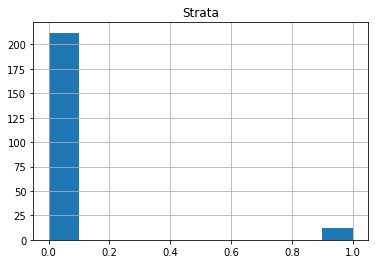

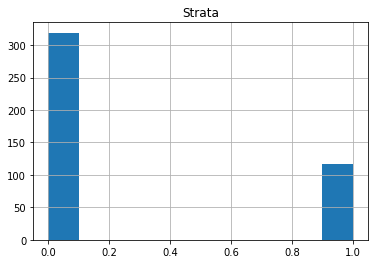

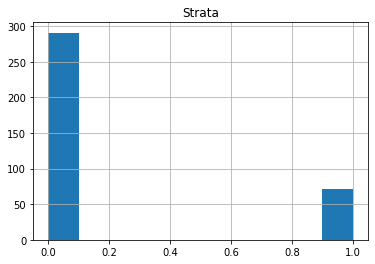

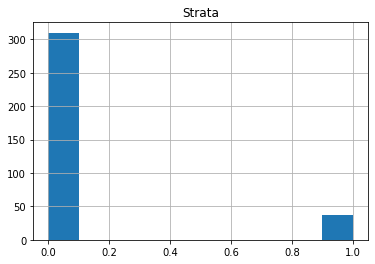

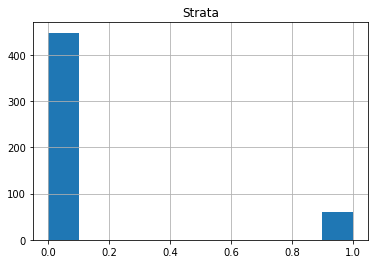

In [79]:
altered_data[["Strata", "Income"]].groupby("Income").hist(label = "Income")

As can be seen, the proportion of individuals living in the Rural strata decreases as the income increases. However, as the proportion of individuals living in the Rural strata is so low, it can suffice to say that the fact that the individual lives in a particular strata can be overlooked.

Based on that, the second key question whether strata and area are correlated does not need to be examined.

Nevertheless, we can examine the correlation between area and income.

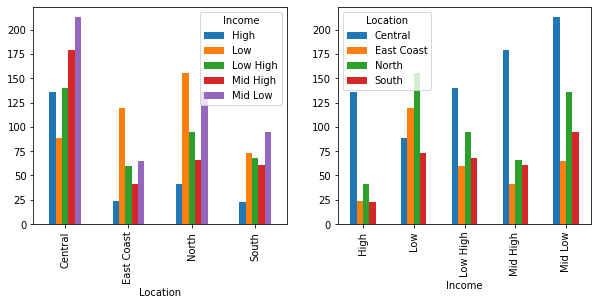

In [80]:
overall_data_segment = overall_data[["Location","Income"]]
overall_data_segment_2 = overall_data.groupby(["Location", "Income"]).size().reset_index(name='Count')

overall_data_segment_3 = pd.pivot_table(overall_data_segment_2,  values='Count',  columns=['Income'],  index = "Location",
                         aggfunc=np.sum,  fill_value=0)
overall_data_segment_4 = pd.pivot_table(overall_data_segment_2,  values='Count',  columns=['Location'],  index = "Income",
                         aggfunc=np.sum,  fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
overall_data_segment_3.plot(kind="bar", ax=ax[0])
overall_data_segment_4.plot(kind="bar", ax=ax[1]) 

Based on the  left plot, it can be seen that the East Coast has a disproportionately high amount of low income individuals which may have resulted in lack of internet access due to lack of amenities.

Based on the right plot, it can be seen that the High income individuals usually come from Central area. This can be attributed to Central being the city area, with much more access to technological amenities.

Hence, our media plan would be heavily skewed towards individuals from Central(city area) with higher income. A key focus then would be to have a media outlet for individuals with lesser income, without access to the Internet.

#Q2b# What do you use in major to connect internet at home? (q_47554 - Type 111)				
v_138	v_138	int	Single response list (vertical)	
		1	Household broadband	
		2	Mobile data	

Based on Q2a, we can then state that only individuals who answered "1" for Q2a would be worth analysing for Q2b.

In [81]:
Q2b_dataset_initial = overall_data[overall_data["v_137"] == 1]
Q2b_dataset = Q2b_dataset_initial.copy()

As with before, we convert the output to binary for easier analysis.

In [82]:
Q2b_dataset["v_138"] = Q2b_dataset["v_138"].replace(2,0)

In [83]:
Q2b_dataset

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
5     105048101          Obese     Malay  Rural  ...     0     0   NaN   1.0
7     105055101   Under Weight     Malay  Rural  ...     0     0   NaN   1.0
8     105058101          Obese     Malay  Rural  ...     0     0   NaN   1.0
11    106006101          Obese     Malay  Urban  ...     0     0   NaN   1.0
12    106012101        Healthy   Chinese  Urban  ...     0     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1863  802171401  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1871  802182401  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1874  802188801  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1875  802188901  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0

[1170 rows x 268 columns]

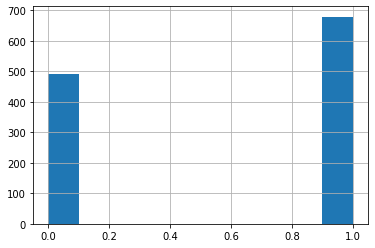

In [84]:
Q2b_dataset['v_138'].hist()

In [85]:
sum(Q2b_dataset['v_138'])/1170

0.5803418803418804

Slightly more than half of individuals choose to use household broadband.

In [86]:
Q2b_dataset_mobile =  Q2b_dataset[Q2b_dataset["v_138"] != 1]

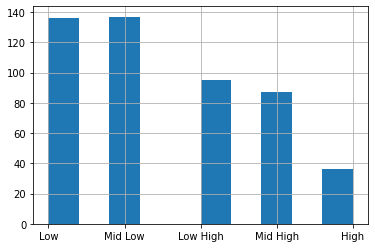

In [87]:
Q2b_dataset_mobile["Income"].hist(label = "Income")

Low income individuals have a tendency to use mobile data. Hence, a possible way we can reach out for a media plan is to lower the mobile data plan costs.

#Q2c# Which service provider do you subscribe on the household broadband? (q_47555 - Type 111)				
v_139	v_139	int	Single response list (vertical)	
		1	Time	
		2	Maxis	
		3	Unifi	
		4	Astro	
		5	Streamyx	
		6	Yes	
		7	P1	
		8	Celcom	
		9	DiGi	
		10	Umobile	
		11	Others	

As per earlier, we designate the data by those who answered 1 for household broadband as these would be the valid output.

In [88]:
Q2c_dataset_initial = Q2b_dataset_initial[Q2b_dataset_initial["v_138"] == 1]
Q2c_dataset = Q2c_dataset_initial.copy()

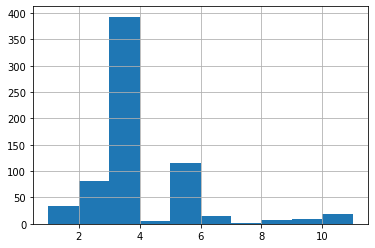

In [89]:
Q2c_dataset["v_139"].hist()

Unifi is the clear majority service provider.
This is a good sign as Unifi is also the national connectivity and digital infrastructure provider and Malaysia's leading integrated telco.

Furthermore, any implementations of telecommunication services will definitely reach out to the vast majority of the target.

#Q2d# In the last 3 months, which of the following statements best describe your internet usage frequency either at home or away from home (for example at work, school, on the road etc.).Description : Using internet can be browsing (Google, Yahoo, etc), chatting (What’sapp, Messenger, etc), shopping (Lazada, etc), email (Outlook, Gmail, etc), watching movie (Youtube, Neflix, etc), listen music, play games, Social Media (FB, Instagram, etc), Reading News (The Star online, Sin Chew daily etc). It can be from Laptop, Desktop, Cell phone, Tablet, etc. (q_47556 - Type 111)				
v_140	v_140	int	Single response list (vertical)	
		1	Everyday	
		2	Several times per week	
		3	Once a week	
		4	Several times per month, but not every week	
		5	Once a month	
		6	Less than once a month	
		7	Never	

We use overall data in this case, as this does not have anything to do with the information in Q2a, b and c.

In [90]:
Q2d_dataset = overall_data.copy()

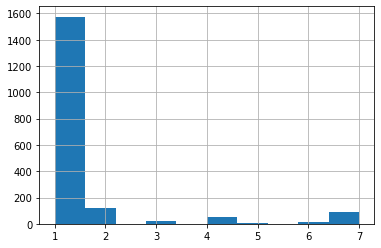

In [91]:
Q2d_dataset["v_140"].hist()

Since the majority of individuals use the internet daily, it can suffice to say that there can be lesser consideration for the specific day of our media plan, with regards to Internet users.

#Q2e# On a typical day in the last week or two roughly how many hours a day did you spend on the internet outside of home (work/school/college/internet café/mobile phone...)? (q_47557 - Type 111)				
v_141	v_141	int	Single response list (vertical)	
		1	30 minutes or less	
		2	31 – 59 minutes	
		3	1 hour to less than 2 hours	
		4	2 hours to less than 3 hours	
		5	3 hours to less than 4 hours	
		6	4 hours to less than 5 hours	
		7	5 hours to less than 6 hours	
		8	6 hours to less than 7 hours	
		9	7 hours or longer	

In [92]:
Q2e_dataset = overall_data.copy()

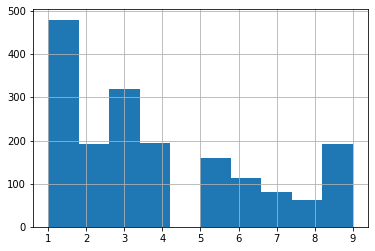

In [93]:
Q2e_dataset["v_141"].hist()

With the clear decreasing trend of time spent on the internet per number of users, we can then surmise that the attention span of the average internet user would be very short.

Hence, we would need our media outputs to be short, as well, as eye catching for a targeted audience. Since it is short, we can also afford to repeat advertisements frequently as it would not be as expensive as a longer advertisement.

With regards to the outlier of 9 hours spent per day, we can denote them as individuals addicted to the Internet and our media output would have a similar effect on them.

However, if we do use longer advertisements, it should be targeted to the outlier demographic.

#Q2f# On a typical day in the last week or two roughly how many hours a day did you spend on the internet at home? (q_47558 - Type 111)				
v_142	v_142	int	Single response list (vertical)	
		1	30 minutes or less	
		2	31 – 59 minutes	
		3	1 hour to less than 2 hours	
		4	2 hours to less than 3 hours	
		5	3 hours to less than 4 hours	
		6	4 hours to less than 5 hours	
		7	5 hours to less than 6 hours	
		8	6 hours to less than 7 hours	
		9	7 hours or longer	

In [94]:
Q2f_dataset = overall_data.copy()

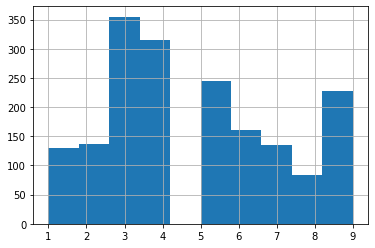

In [95]:
Q2f_dataset["v_142"].hist()

As mentioned earlier:
With regards to the outlier of 9 hours spent per day, we can denote them as individuals addicted to the Internet and our media output would have a similar effect on them.

We can now see that this is a completely different situation from Q2e, where we examined outside of home usage.

Since this is home usage, we can understand why users end up spending more time on the Internet. Since the amount of time spent is 2 to 4 hours for the majority, we can utilise longer media advertisements for home usage. Home usage, in this case, would fall within the specific timings where individuals are most likely to be at home, i.e. the weekend or weekday early morning or late night.

However, for consideration of weekend, that can be a minute consideration, considering the outcome of Q2d analysis.

Based on 2e and 2f, we can now see that shorter media advertisements should be used when individuals are not at home and longer media advertisements when they are most likely to be at home.

#Q2i# What device do you usually use to access the internet? Most Often (q_47559 - Type 111)				
v_143	v_143	int	Single response list (vertical)	
		1	Computer	
		2	Phone	
		3	Tablet	
		4	Smart-TV	
		5	Others, please specify	
v_144	v_144	varchar	Others, please specify	

In [96]:
Q2i_dataset = overall_data.copy()

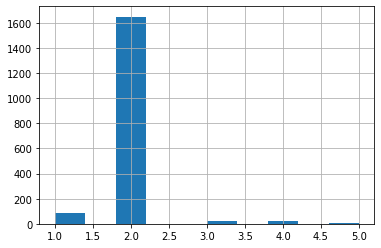

In [97]:
Q2i_dataset["v_143"].hist()

Phone in this case would be the majority. Hence, advertisements should cater to the phone outlet, e.g.:

Click-to-download ads: The user will be directed to the Appstore or Google Play

Click-to-call ads: The user will call to a phone number after clicking the button.

Click-to-message ads: The user will be directed to an SMS application to message the advertiser.

Image text and banner ads: A click opens your browser and re-directs you to a page

Push notification

Pin pull ads: Mostly common in Playrix ads

Different kinds of advertisements would appeal to different demographics. Hence, we would need to see the age and lifestyle of the specific demographics at that timing.

Furthermore, we would need to understand which demographic is of higher priority dependent on bmi.

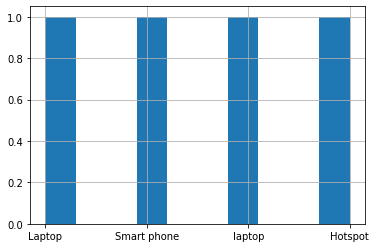

In [98]:
Q2i_dataset["v_144"].hist()

There are only 4 counts of individuals. Basing on our earlier scale, it is definite that this would not affect our analysis. 

Adding on, 2 of these relate to phones ^_____^
2 relate to computer.

Hence, this increases both columns compared to the other column but the difference between computer and phones is still the same. Computer itself is also the 2nd highest column by the exact same margin.

#Q2i# What device do you usually use to access the internet? Others ever used (q_47560 - Type 121)				
v_147	v_147	int	List element: Computer (Source variable (of the selected source project): v_143 (Single response list (vertical)))	
		0	not quoted	
		1	quoted	
v_148	v_148	int	List element: Phone (Source variable (of the selected source project): v_143 (Single response list (vertical)))	
		0	not quoted	
		1	quoted	
v_149	v_149	int	List element: Tablet (Source variable (of the selected source project): v_143 (Single response list (vertical)))	
		0	not quoted	
		1	quoted	
v_150	v_150	int	List element: Smart-TV (Source variable (of the selected source project): v_143 (Single response list (vertical)))	
		0	not quoted	
		1	quoted	
v_151	v_151	int	Others, please specify	
		0	not quoted	
		1	quoted	
v_152	v_152	varchar	Others, please specify	
v_317	v_317	int	None	
		0	not quoted	
		1	quoted	

This question mainly focuses on the alternatives individuals would use beside their main channel of internet usage.

In [99]:
Q2i_dataset

ID            BMI Ethnicity Strata  ... v_310 v_311 v_312 v_333
0     101011101          Obese     Malay  Urban  ...     0     0   NaN   1.0
1     105017101          Obese     Malay  Rural  ...     0     0   NaN   1.0
2     105021106          Obese     Malay  Rural  ...     0     0   NaN   1.0
3     105044101    Over Weight   Chinese  Rural  ...     0     0   NaN   1.0
4     105046101        Healthy     Malay  Rural  ...     1     0   NaN   0.0
...         ...            ...       ...    ...  ...   ...   ...   ...   ...
1873  802188101  Not Available     Malay  Urban  ...     0     0   NaN   1.0
1874  802188801  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1875  802188901  Not Available     Malay  Rural  ...     1     0   NaN   0.0
1876  802189701  Not Available     Malay  Urban  ...     1     0   NaN   0.0
1877  802220001  Not Available     Malay  Urban  ...     0     0   NaN   0.0

[1878 rows x 268 columns]

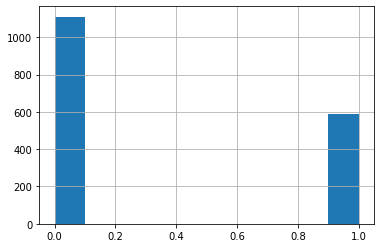

In [100]:
Q2i_dataset["v_147"].hist()

In [101]:
Q2i_dataset["v_147"].value_counts()[1]/(Q2i_dataset["v_147"].value_counts()[1] + Q2i_dataset["v_147"].value_counts()[0])

0.3474426807760141

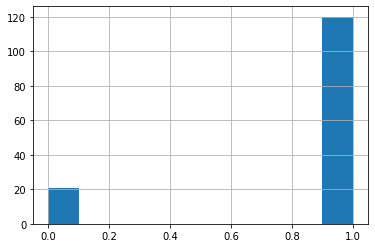

In [102]:
Q2i_dataset["v_148"].hist()

In [103]:
Q2i_dataset["v_148"].value_counts()[1]/(Q2i_dataset["v_148"].value_counts()[1] + Q2i_dataset["v_148"].value_counts()[0])

0.851063829787234

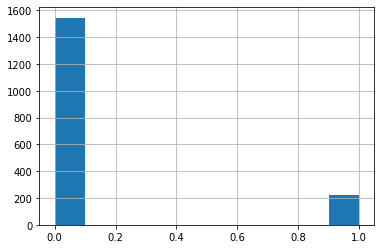

In [104]:
Q2i_dataset["v_149"].hist()

In [105]:
Q2i_dataset["v_149"].value_counts()[1]/(Q2i_dataset["v_149"].value_counts()[1] + Q2i_dataset["v_149"].value_counts()[0])

0.12464589235127478

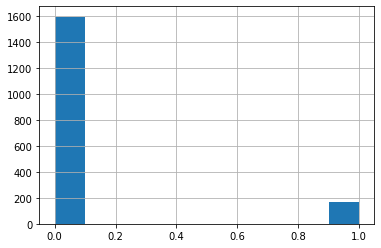

In [106]:
Q2i_dataset["v_150"].hist()

In [107]:
Q2i_dataset["v_150"].value_counts()[1]/(Q2i_dataset["v_150"].value_counts()[1] + Q2i_dataset["v_150"].value_counts()[0])

0.09693877551020408

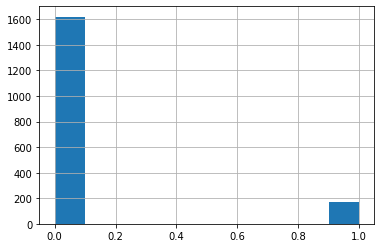

In [108]:
Q2i_dataset["v_151"].hist()

In [109]:
Q2i_dataset["v_151"].value_counts()[1]/(Q2i_dataset["v_151"].value_counts()[1] + Q2i_dataset["v_151"].value_counts()[0])

0.09390721073225265

Computer can then be seen to be the clear majority alternative if individuals cannot use their phones.

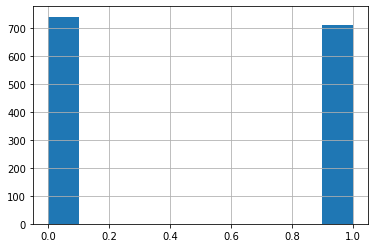

In [110]:
Q2i_dataset["v_317"].hist()

In [111]:
Q2i_dataset["v_317"].value_counts()[1]/(Q2i_dataset["v_317"].value_counts()[1] + Q2i_dataset["v_317"].value_counts()[0])

0.4903713892709766

Surprisingly, slightly less than half of individuals polled did not use the internet. Hence, we would definitely need to formulate a section of the media plan for these individuals.

In [112]:
Q2i_dataset["v_152"]

0           NaN
1           NaN
2           NaN
3           NaN
4       Tflefon
         ...   
1873        NaN
1874        NaN
1875        NaN
1876        NaN
1877    Telefon
Name: v_152, Length: 1878, dtype: object

In [113]:
Q2i_dataset["v_152"].value_counts()

Telefon                 27
Laptop                  16
Handphone               12
Phone                   10
telefon                  8
                        ..
电话                       1
data fon                 1
Telefon dan komputer     1
Telefonpintar            1
Telepon                  1
Name: v_152, Length: 64, dtype: int64

Based on this, we can see that most individuals would either use Phone or Computer, as highlighted earlier for this question.

This further highlights that Computer would be the go-to alternative if Phone is not present.

Nevertheless, as earlier stated, phone is the overwhelming majority device of internet usage.

					
#Q2j# How often do you usually visit these types of websites? (q_48051 - Type 311)					
v_318	v_318	int	News		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_319	v_319	int	Forums		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_320	v_320	int	Social network		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_321	v_321	int	Search		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_322	v_322	int	Online music		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_323	v_323	int	Online video (unpaid)		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_324	v_324	int	Online movie (paid, subscription basis)		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_325	v_325	int	Game online		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_326	v_326	int	Chat online		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_327	v_327	int	Email		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_328	v_328	int	Entertainment		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_329	v_329	int	Beauty/ Fashion		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_330	v_330	int	Online shopping/ auction site		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_331	v_331	int	Family daily life/ knowledge		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
v_332	v_332	int	Online banking		
		1	Everyday		
		2	2-4 times a week		
		3	Once a week		
		4	Once every 2-3 weeks		
		5	Once a month		
		6	Less frequently		
		7	Never		
 					

In [114]:
Q2j_dataset = overall_data.copy()

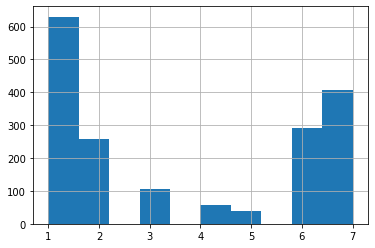

In [115]:
Q2j_dataset["v_318"].hist()

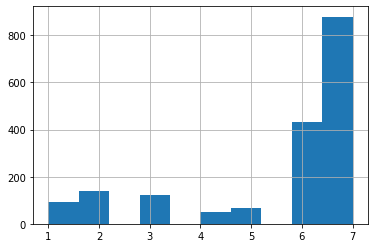

In [116]:
Q2j_dataset["v_319"].hist()

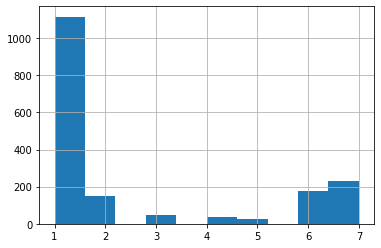

In [117]:
Q2j_dataset["v_320"].hist()

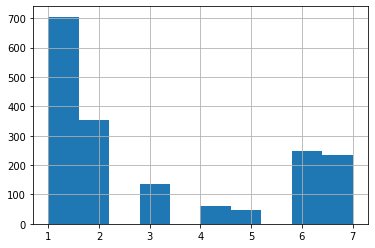

In [118]:
Q2j_dataset["v_321"].hist()

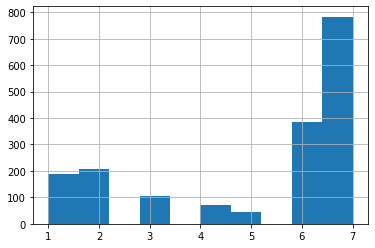

In [119]:
Q2j_dataset["v_322"].hist()

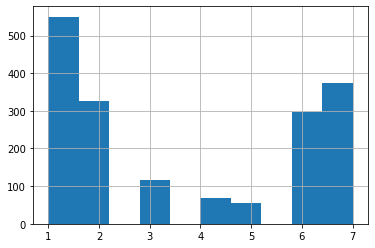

In [120]:
Q2j_dataset["v_323"].hist()

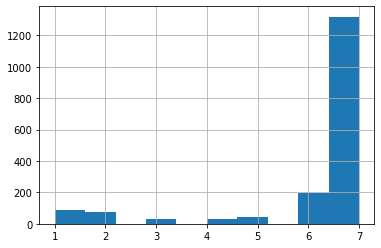

In [121]:
Q2j_dataset["v_324"].hist()

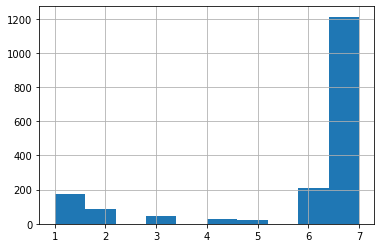

In [122]:
Q2j_dataset["v_325"].hist()

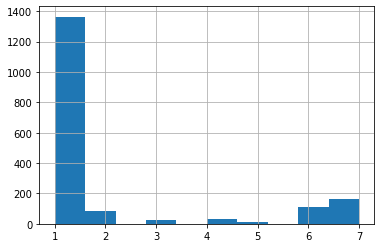

In [123]:
Q2j_dataset["v_326"].hist()

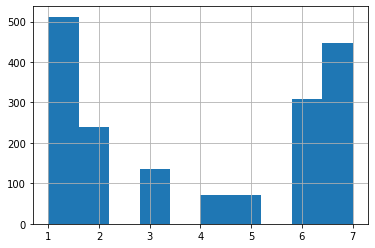

In [124]:
Q2j_dataset["v_327"].hist()

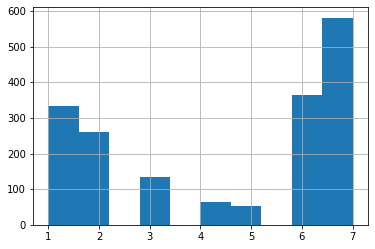

In [125]:
Q2j_dataset["v_328"].hist()

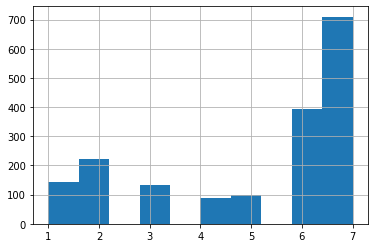

In [126]:
Q2j_dataset["v_329"].hist()

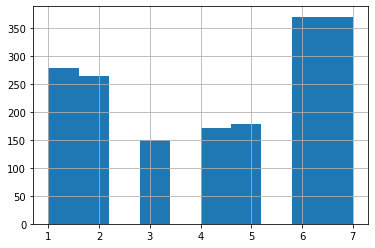

In [127]:
Q2j_dataset["v_330"].hist()

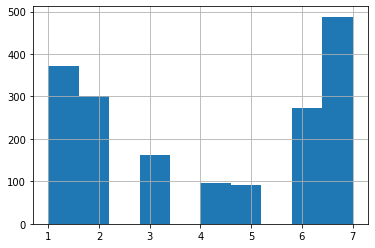

In [128]:
Q2j_dataset["v_331"].hist()

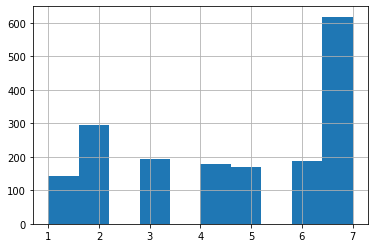

In [129]:
Q2j_dataset["v_332"].hist()

19, 22, 24, 25, 29, 32 - Never Look -
Forum, online music, movie, game, fashion, banking
[Ignore these categories]

20, 21, 26 - Heavy Usage - Social Network, Search, Chat Online [Focus on these]

23, 27, 28, 30, 31 - Equal Proportion - Video, Email, entertainment, shopping, family [Back up options]

#Q2k# And how often do you usually visit these specific websites/ Apps? (q_47561 - Type 311)				
v_158	v_158	int	Air Asia	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_159	v_159	int	Astro	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_160	v_160	int	Cimbclick	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_161	v_161	int	Facebook	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_162	v_162	int	Gmail	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_163	v_163	int	Google	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_164	v_164	int	Grab	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_165	v_165	int	Instagram	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_166	v_166	int	Lazada	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_167	v_167	int	Linkedin	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_168	v_168	int	Taobao	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_169	v_169	int	Lowyat	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_170	v_170	int	Malaysiakini	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_171	v_171	int	Maybank2u	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_172	v_172	int	Mudah	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_173	v_173	int	Netflix	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_174	v_174	int	Paultan	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_175	v_175	int	Shoppee	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_176	v_176	int	Sinarharian	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_177	v_177	int	Thestar	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_178	v_178	int	TripAdvisor	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_179	v_179	int	Twitter	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_180	v_180	int	Waze	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_181	v_181	int	Whatsapp	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_182	v_182	int	Yahoo	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
v_183	v_183	int	Youtube	
		1	Everyday	
		2	2-4 times a week	
		3	Once a week	
		4	Once every 2-3 weeks	
		5	Once a month	
		6	Less frequently	
		7	Never	
 				

In [130]:
Q2k_dataset = overall_data.copy()

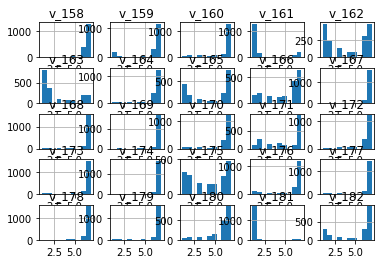

In [132]:
Q2k_dataset[["v_158", "v_159", "v_160", "v_161", "v_162", "v_163", "v_164", "v_165", "v_166", "v_167", "v_168", "v_169", "v_170", "v_171", "v_172", "v_173", "v_174", "v_175", "v_176", "v_177", "v_178", "v_179", "v_180", "v_181", "v_182"]].hist();

Low frequency - ignore - 158, 159, 160, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182


Equal Proportion - 162, 165, 175 (back up)
Gmail, Instagram, Shoppee

High frequency - focus - 161, 163, 181
Facebook, Google, WhatsApp

Since Google and Whatsapp would not be possible for media output, we have to focus on our backup, which is Instagram; since as stated earlier, Shopping is a heavy focus for our dataset. 

As such, specifically, we will be relying on Facebook and Instagram as our main form of media outreach.